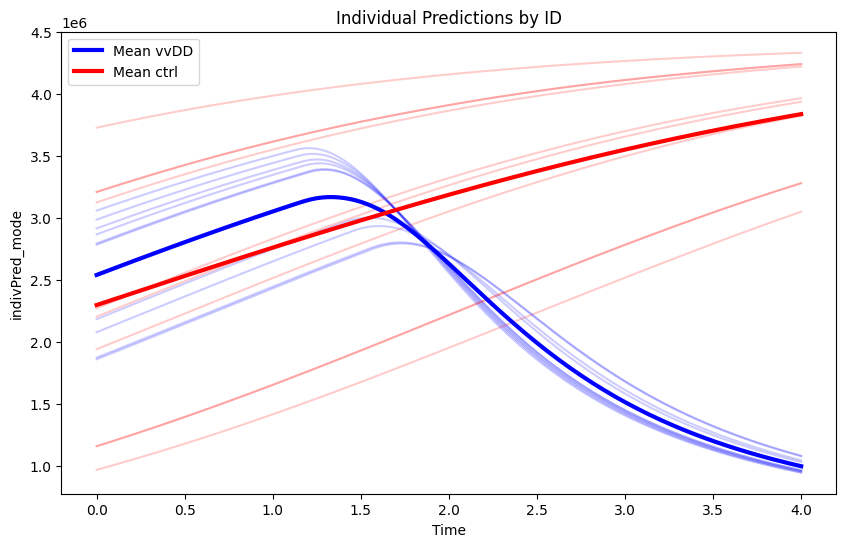

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'monolix_v1/DataFile/indfits_data.csv'
data = pd.read_csv(file_path)

# Convert columns to numeric
data['TIME'] = pd.to_numeric(data['TIME'], errors='coerce')
data['indivPred_mode'] = pd.to_numeric(data['indivPred_mode'], errors='coerce')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate through each unique ID
for id in data['ID'].unique():
    individual_data = data[data['ID'] == id]
    color = 'blue' if individual_data['GROUP'].iloc[0] == 'vvDD' else 'red'
    
    # Plot the data
    plt.plot(individual_data['TIME'], individual_data['indivPred_mode'], alpha=0.2, color=color)

# Calculate the mean of indivPred_mode at each time point for ID 1-10 and ID 11-20
mean_id_1_10 = data[data['ID'].between(1, 10)].groupby('TIME')['indivPred_mode'].mean()
mean_id_11_20 = data[data['ID'].between(11, 20)].groupby('TIME')['indivPred_mode'].mean()

# Plot the means
plt.plot(mean_id_1_10.index, mean_id_1_10.values, label='Mean vvDD', color='blue', linewidth=3)
plt.plot(mean_id_11_20.index, mean_id_11_20.values, label='Mean ctrl', color='red', linewidth=3)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('indivPred_mode')
plt.title('Individual Predictions by ID')
plt.legend()
plt.show()